# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [9]:
AP = pd.read_csv("avocado.csv")
AP.head()

,Id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Loading the data set into “AP” variable and processing the first 5 rows. As most of the column are float in nature and type and region are of categorical value.

# Exploratory Data Analysis(EDA)

In [10]:
# We will drop Id column because it has no effect on dataset
AP.drop('Id', inplace = True, axis = 1)

In [11]:
AP.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
#checking the dimension of data
AP.shape

(18249, 13)

In [13]:
AP.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [15]:
AP.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [16]:
AP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [17]:
AP.isnull().sum().sum()

0

In [18]:
AP.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

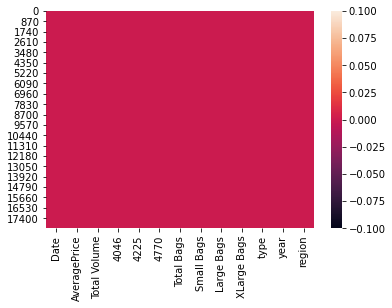

In [19]:
#lets visualize it using heatmap
sns.heatmap(AP.isnull())

In [21]:
#checking the mean of price at each year of organic type of avacado
AP.groupby ('year') ['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [22]:
#finding how much type of avacado is sell in last 4 year 
AP.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In above, I am finding that year 2017 is aggressive year where avocado price is higher as compared to other year and 2015 is at second number.
Also, I am finding that at each year present in the data set, which type of avocado is has total count, so both type of avocado is present almost in same amount in the data set.

In [23]:
AP.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [24]:
#Separating Numerical and Categorical columns

#Checking for categorical columns
categorical_col = []
for i in AP.dtypes.index:
    if AP.dtypes[i] == "object":
        categorical_col.append(i)
        
print("Categorical Columns: ", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in AP.dtypes.index:
    if AP.dtypes[i]!= "object":
        numerical_col.append(i)
        
print("Numerical Columns: ", numerical_col)
print("\n")

Categorical Columns:  ['Date', 'type', 'region']


Numerical Columns:  ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']




In [25]:
# Checking number of unique values in each column
AP.nunique().to_frame("No. of unique values")

,No. of unique values
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588


# Data Visualization

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

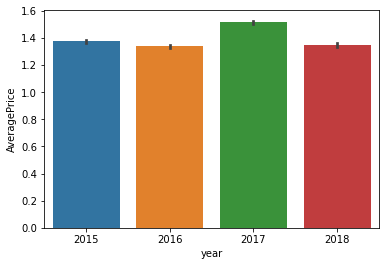

In [36]:
sns.barplot(x = "year", y = "AveragePrice", data = AP)

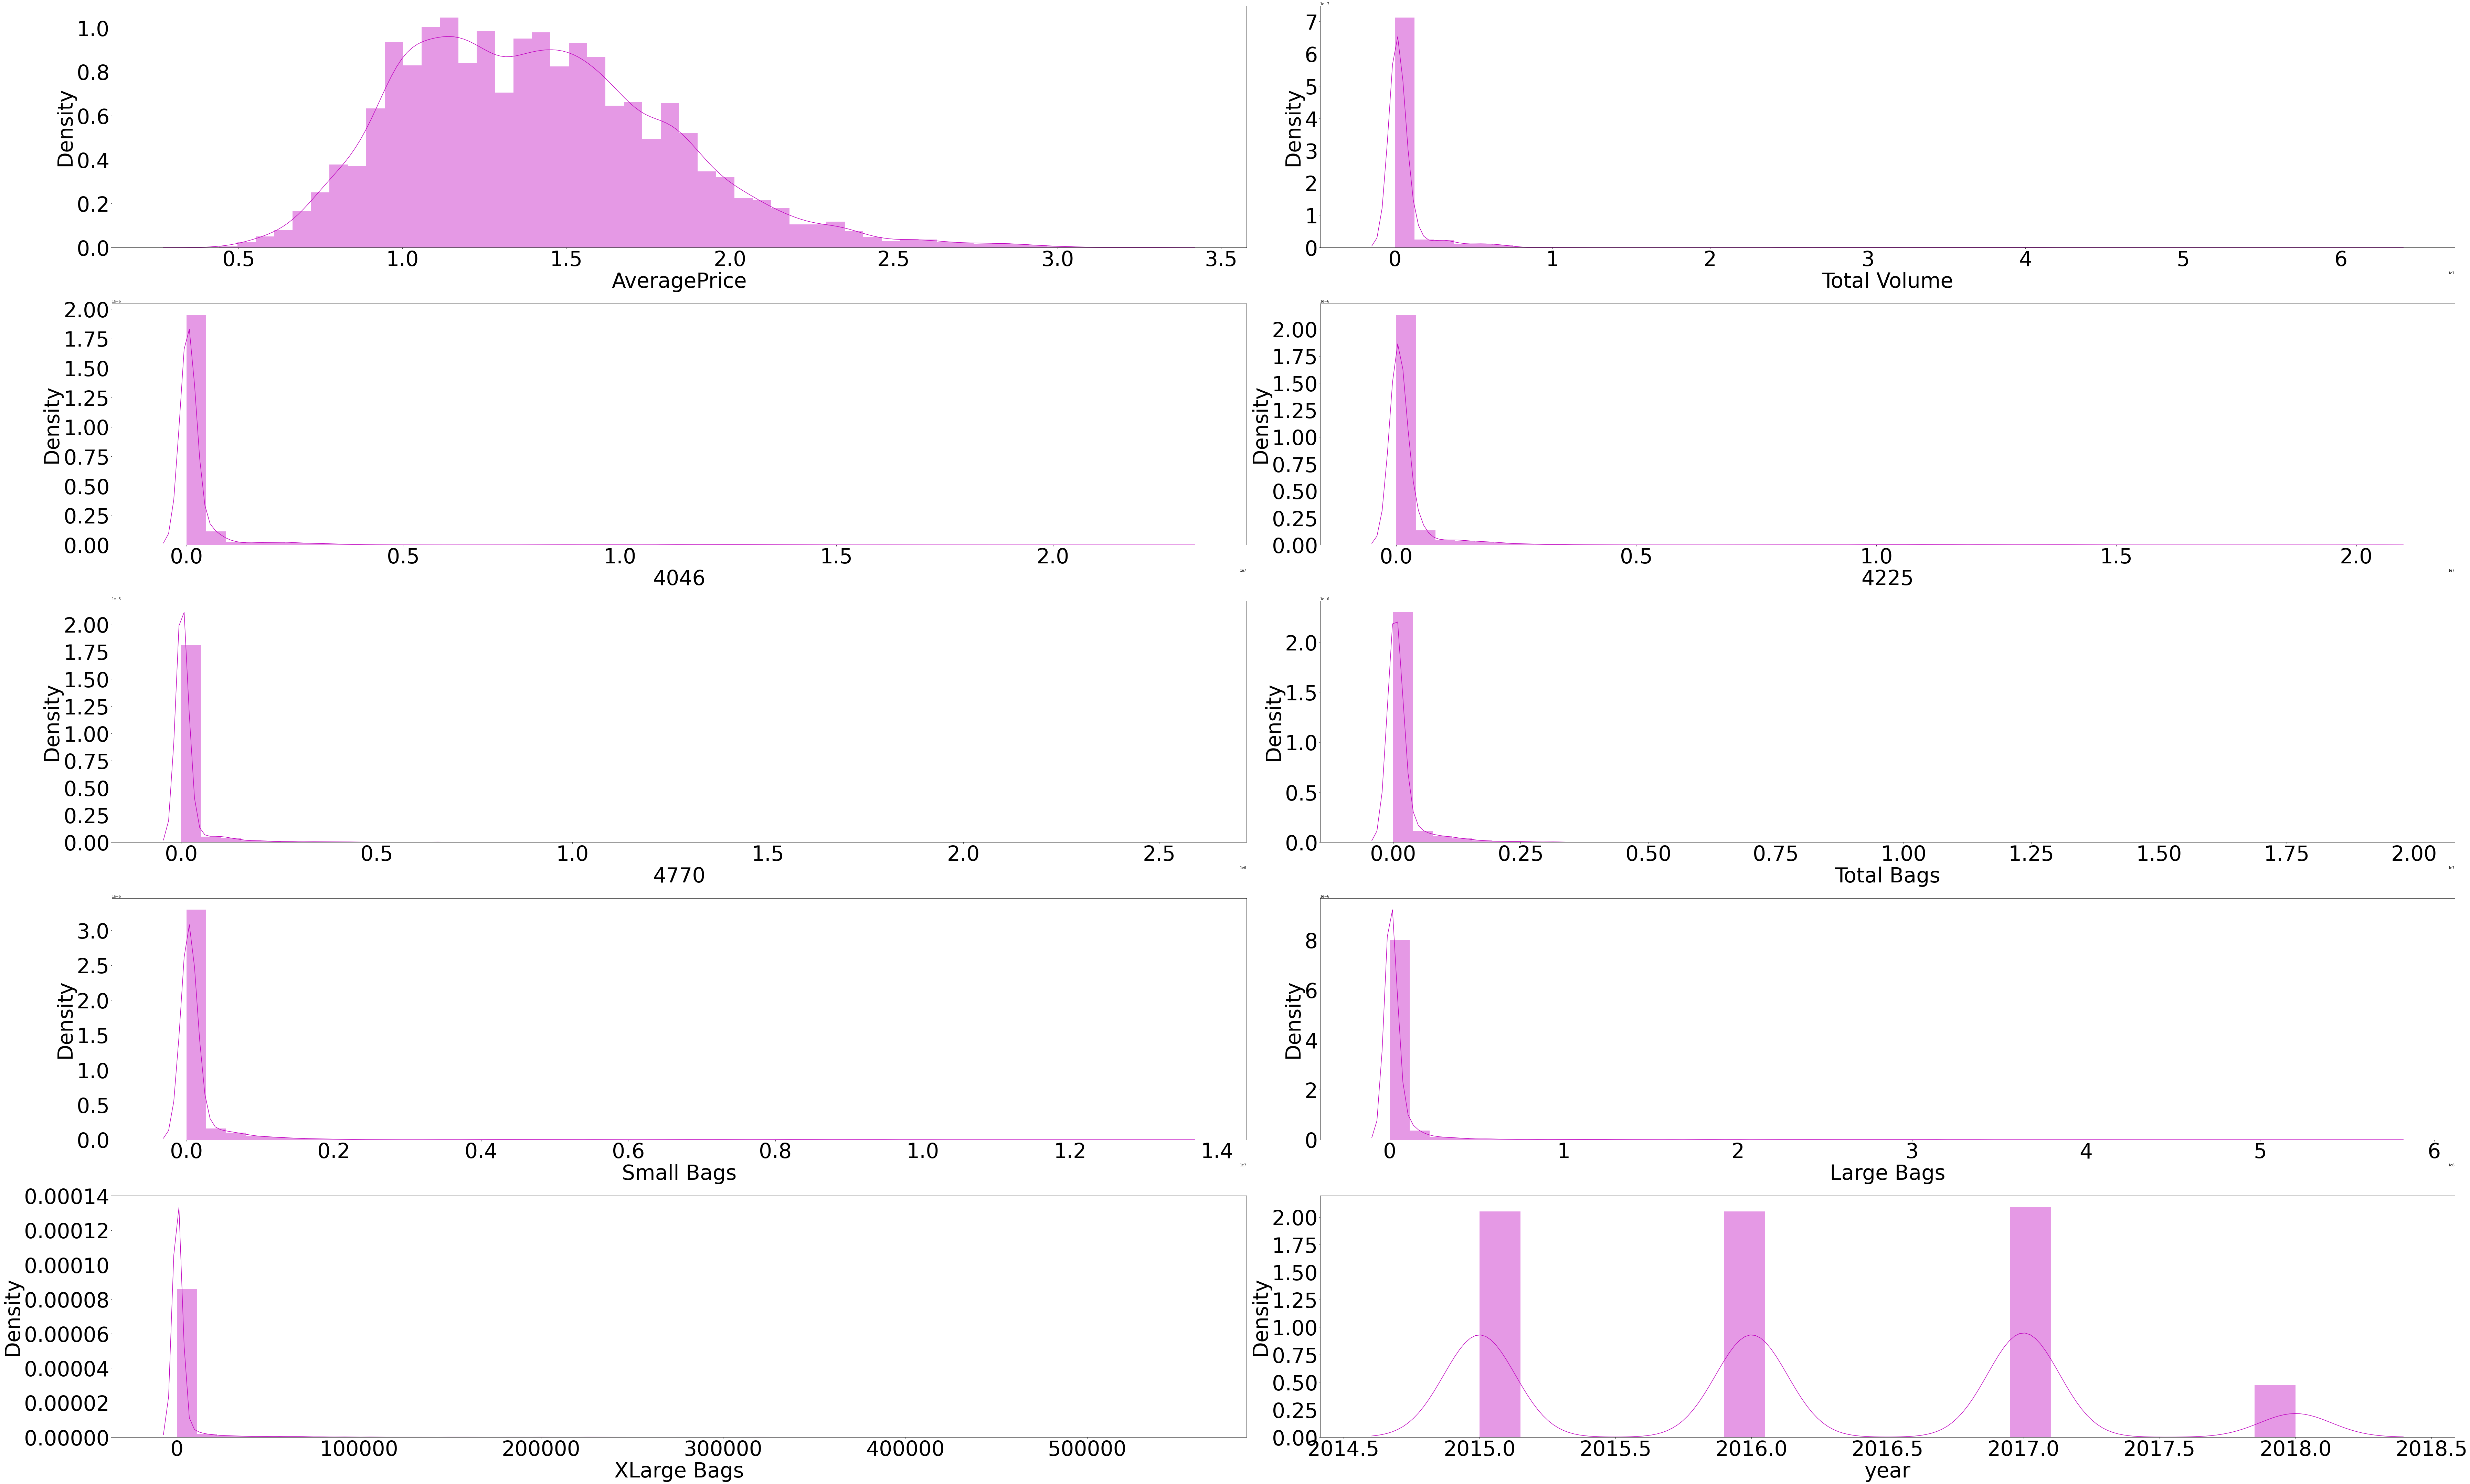

In [41]:
#let's check how the data has been distributed in remaining column
from socket import socket
plt.figure(figsize = (100, 60), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.distplot(AP[col], color = "m")
        plt.xlabel(col, fontsize = 60)
        plt.ylabel('Density', fontsize = 60)
        plt.yticks(rotation = 0, fontsize = 60)
        plt.xticks(rotation = 0, fontsize = 60)
    plotnumber+=1
plt.tight_layout()

# Checking for Outliers

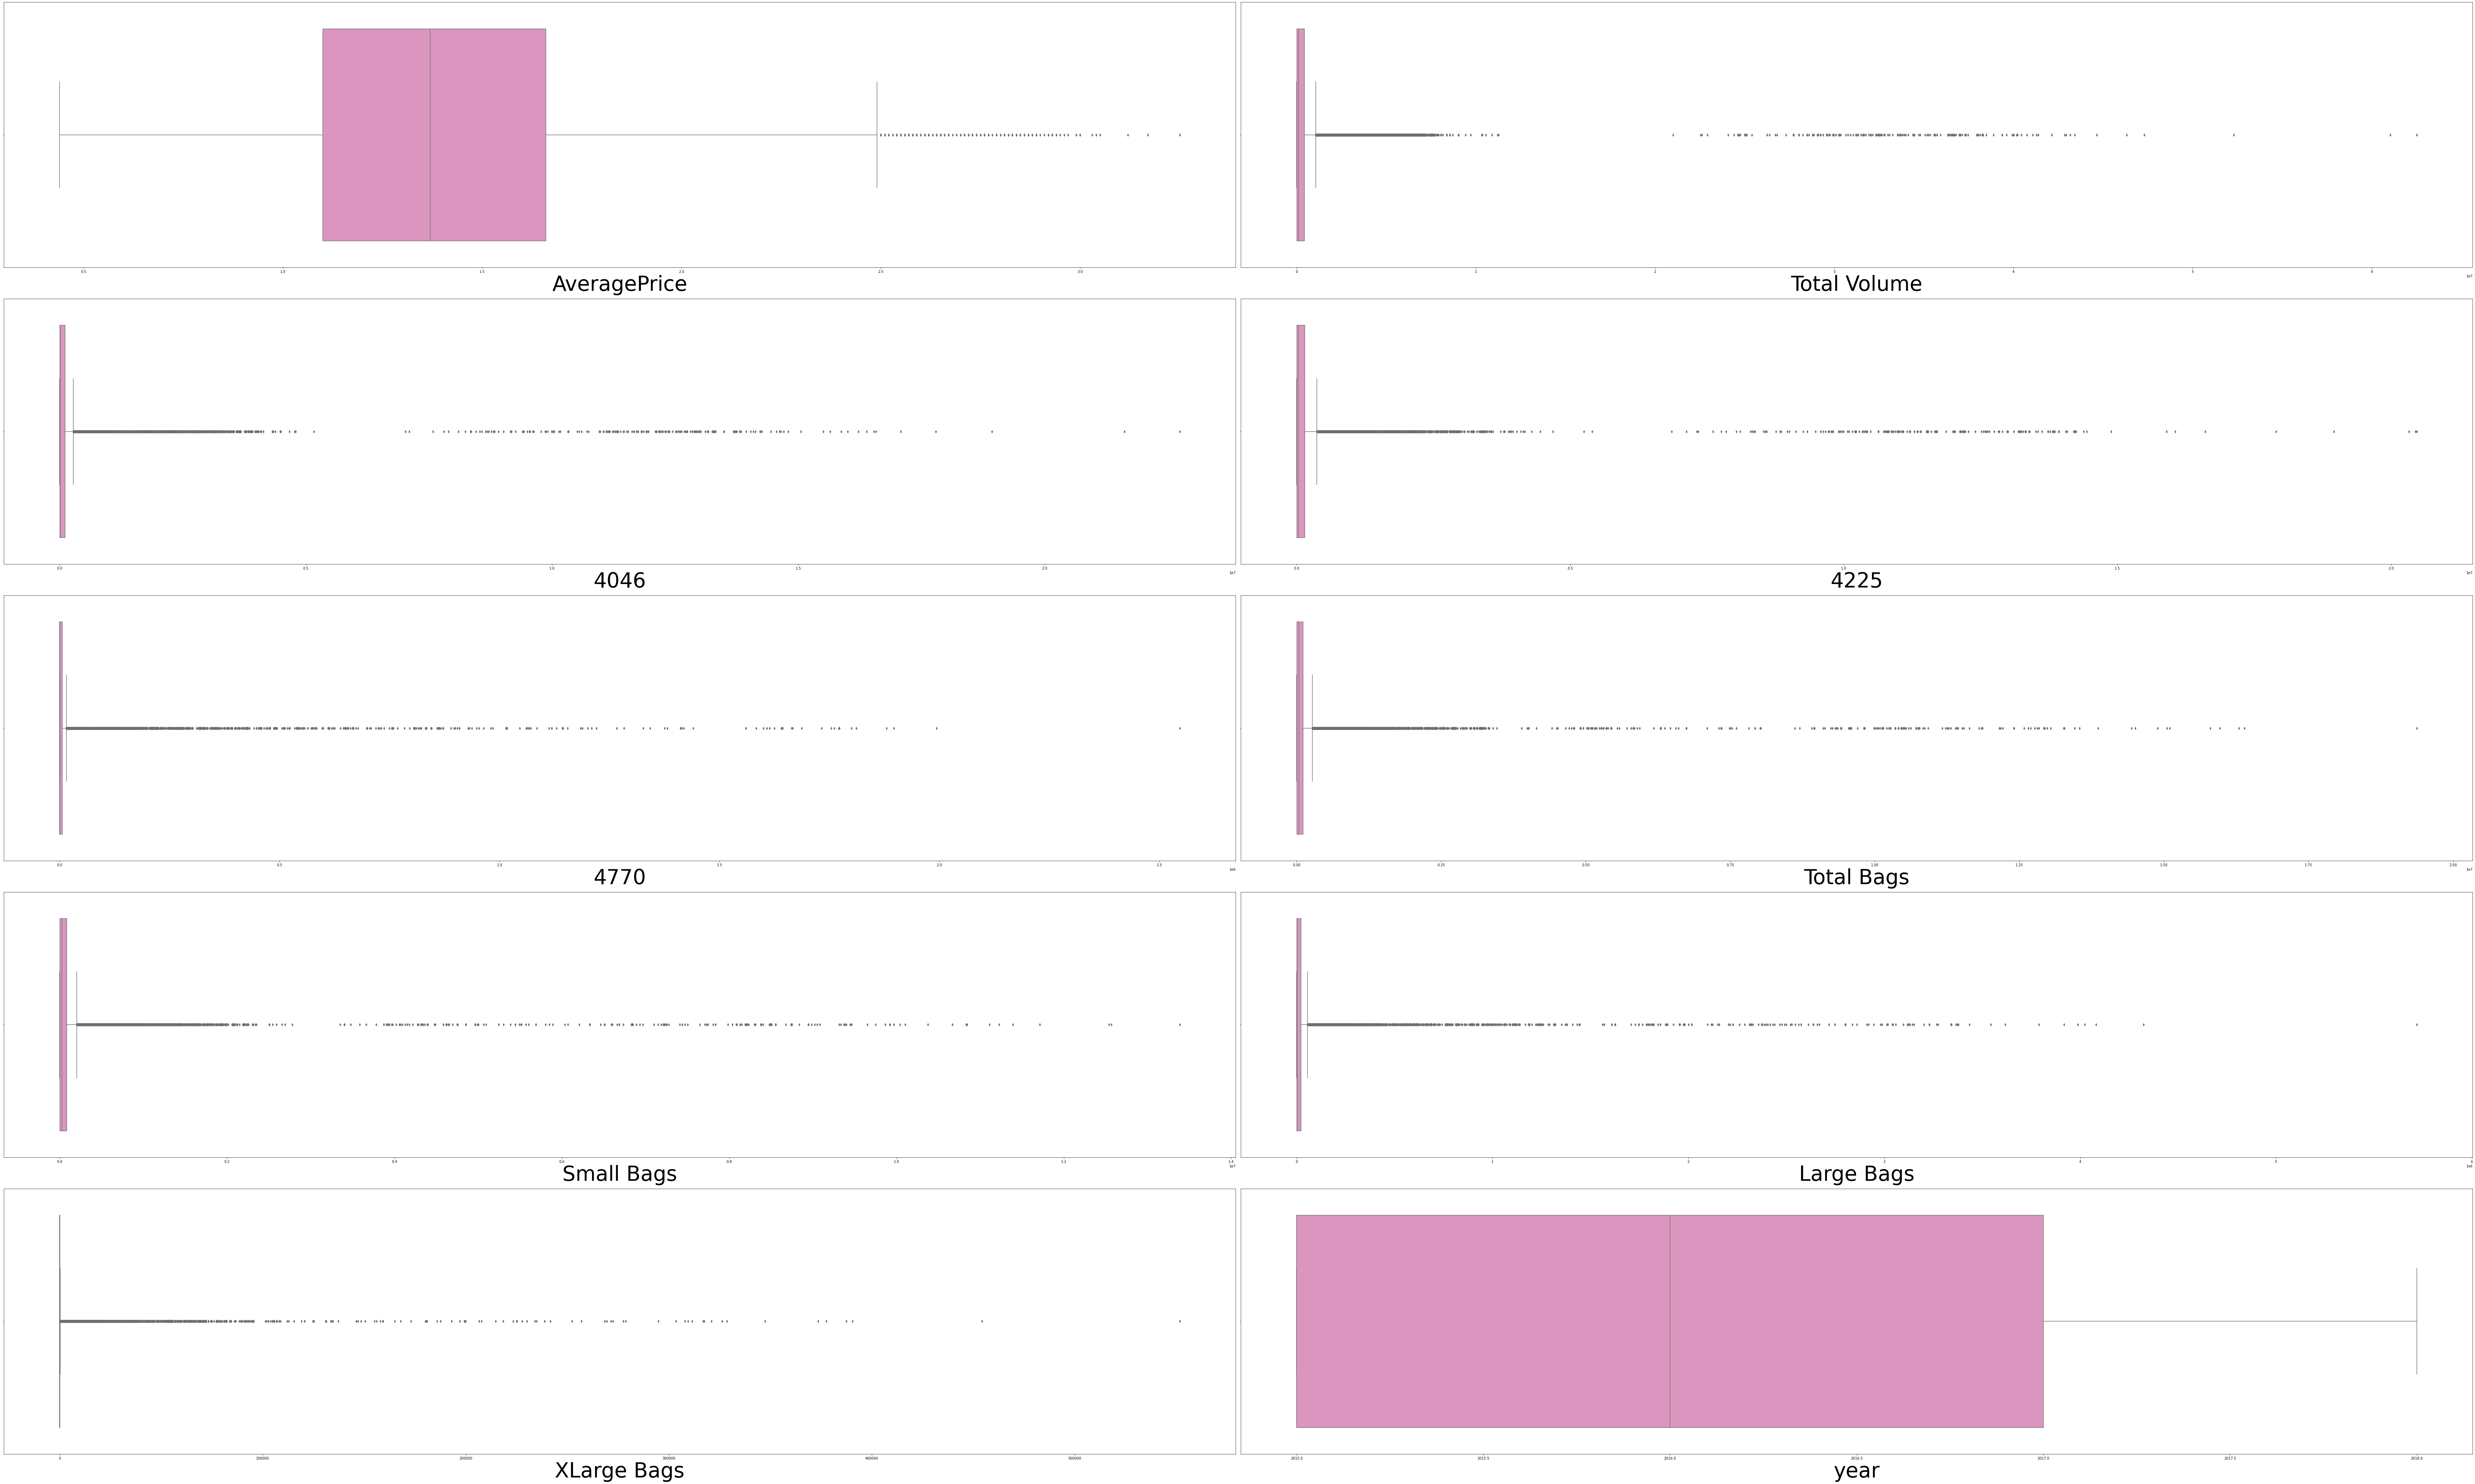

In [43]:
# Lets check the outliers by plotting boxplot

plt.figure(figsize = (100, 60), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.boxplot(AP[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 60)
        plt.yticks(rotation = 0, fontsize = 60)
    plotnumber+=1
plt.tight_layout()

# Checking for skweness

In [44]:
AP.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

# Removing Skweness

In [45]:
# Removing skewness using cuberoot method
AP['Total Volume'] = np.cbrt(AP['Total Volume'])
AP['4046'] = np.cbrt(AP['4046'])
AP['4225'] = np.cbrt(AP['4225'])
AP['4770'] = np.cbrt(AP['4770'])
AP['Total Bags'] = np.cbrt(AP['Total Bags'])
AP['Small Bags'] = np.cbrt(AP['Small Bags'])
AP['Large Bags'] = np.cbrt(AP['Large Bags'])
AP['XLarge Bags'] = np.cbrt(AP['XLarge Bags'])

In [46]:
AP.skew()

AveragePrice    0.580303
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
year            0.215339
dtype: float64

In [47]:
# Removing skewness again using cuberoot method
AP['Total Volume'] = np.cbrt(AP['Total Volume'])
AP['4046'] = np.cbrt(AP['4046'])
AP['4225'] = np.cbrt(AP['4225'])
AP['4770'] = np.cbrt(AP['4770'])
AP['Total Bags'] = np.cbrt(AP['Total Bags'])
AP['Small Bags'] = np.cbrt(AP['Small Bags'])
AP['Large Bags'] = np.cbrt(AP['Large Bags'])
AP['XLarge Bags'] = np.cbrt(AP['XLarge Bags'])

In [48]:
# Checking skewness again
AP.skew()

AveragePrice    0.580303
Total Volume    0.624128
4046            0.296549
4225            0.248376
4770           -0.014697
Total Bags      0.473809
Small Bags      0.043672
Large Bags     -0.499222
XLarge Bags     1.023563
year            0.215339
dtype: float64

In [49]:
AP['XLarge Bags'] = np.cbrt(AP['XLarge Bags'])

In [50]:
# Checking Skewness again
AP.skew()

AveragePrice    0.580303
Total Volume    0.624128
4046            0.296549
4225            0.248376
4770           -0.014697
Total Bags      0.473809
Small Bags      0.043672
Large Bags     -0.499222
XLarge Bags     0.720804
year            0.215339
dtype: float64

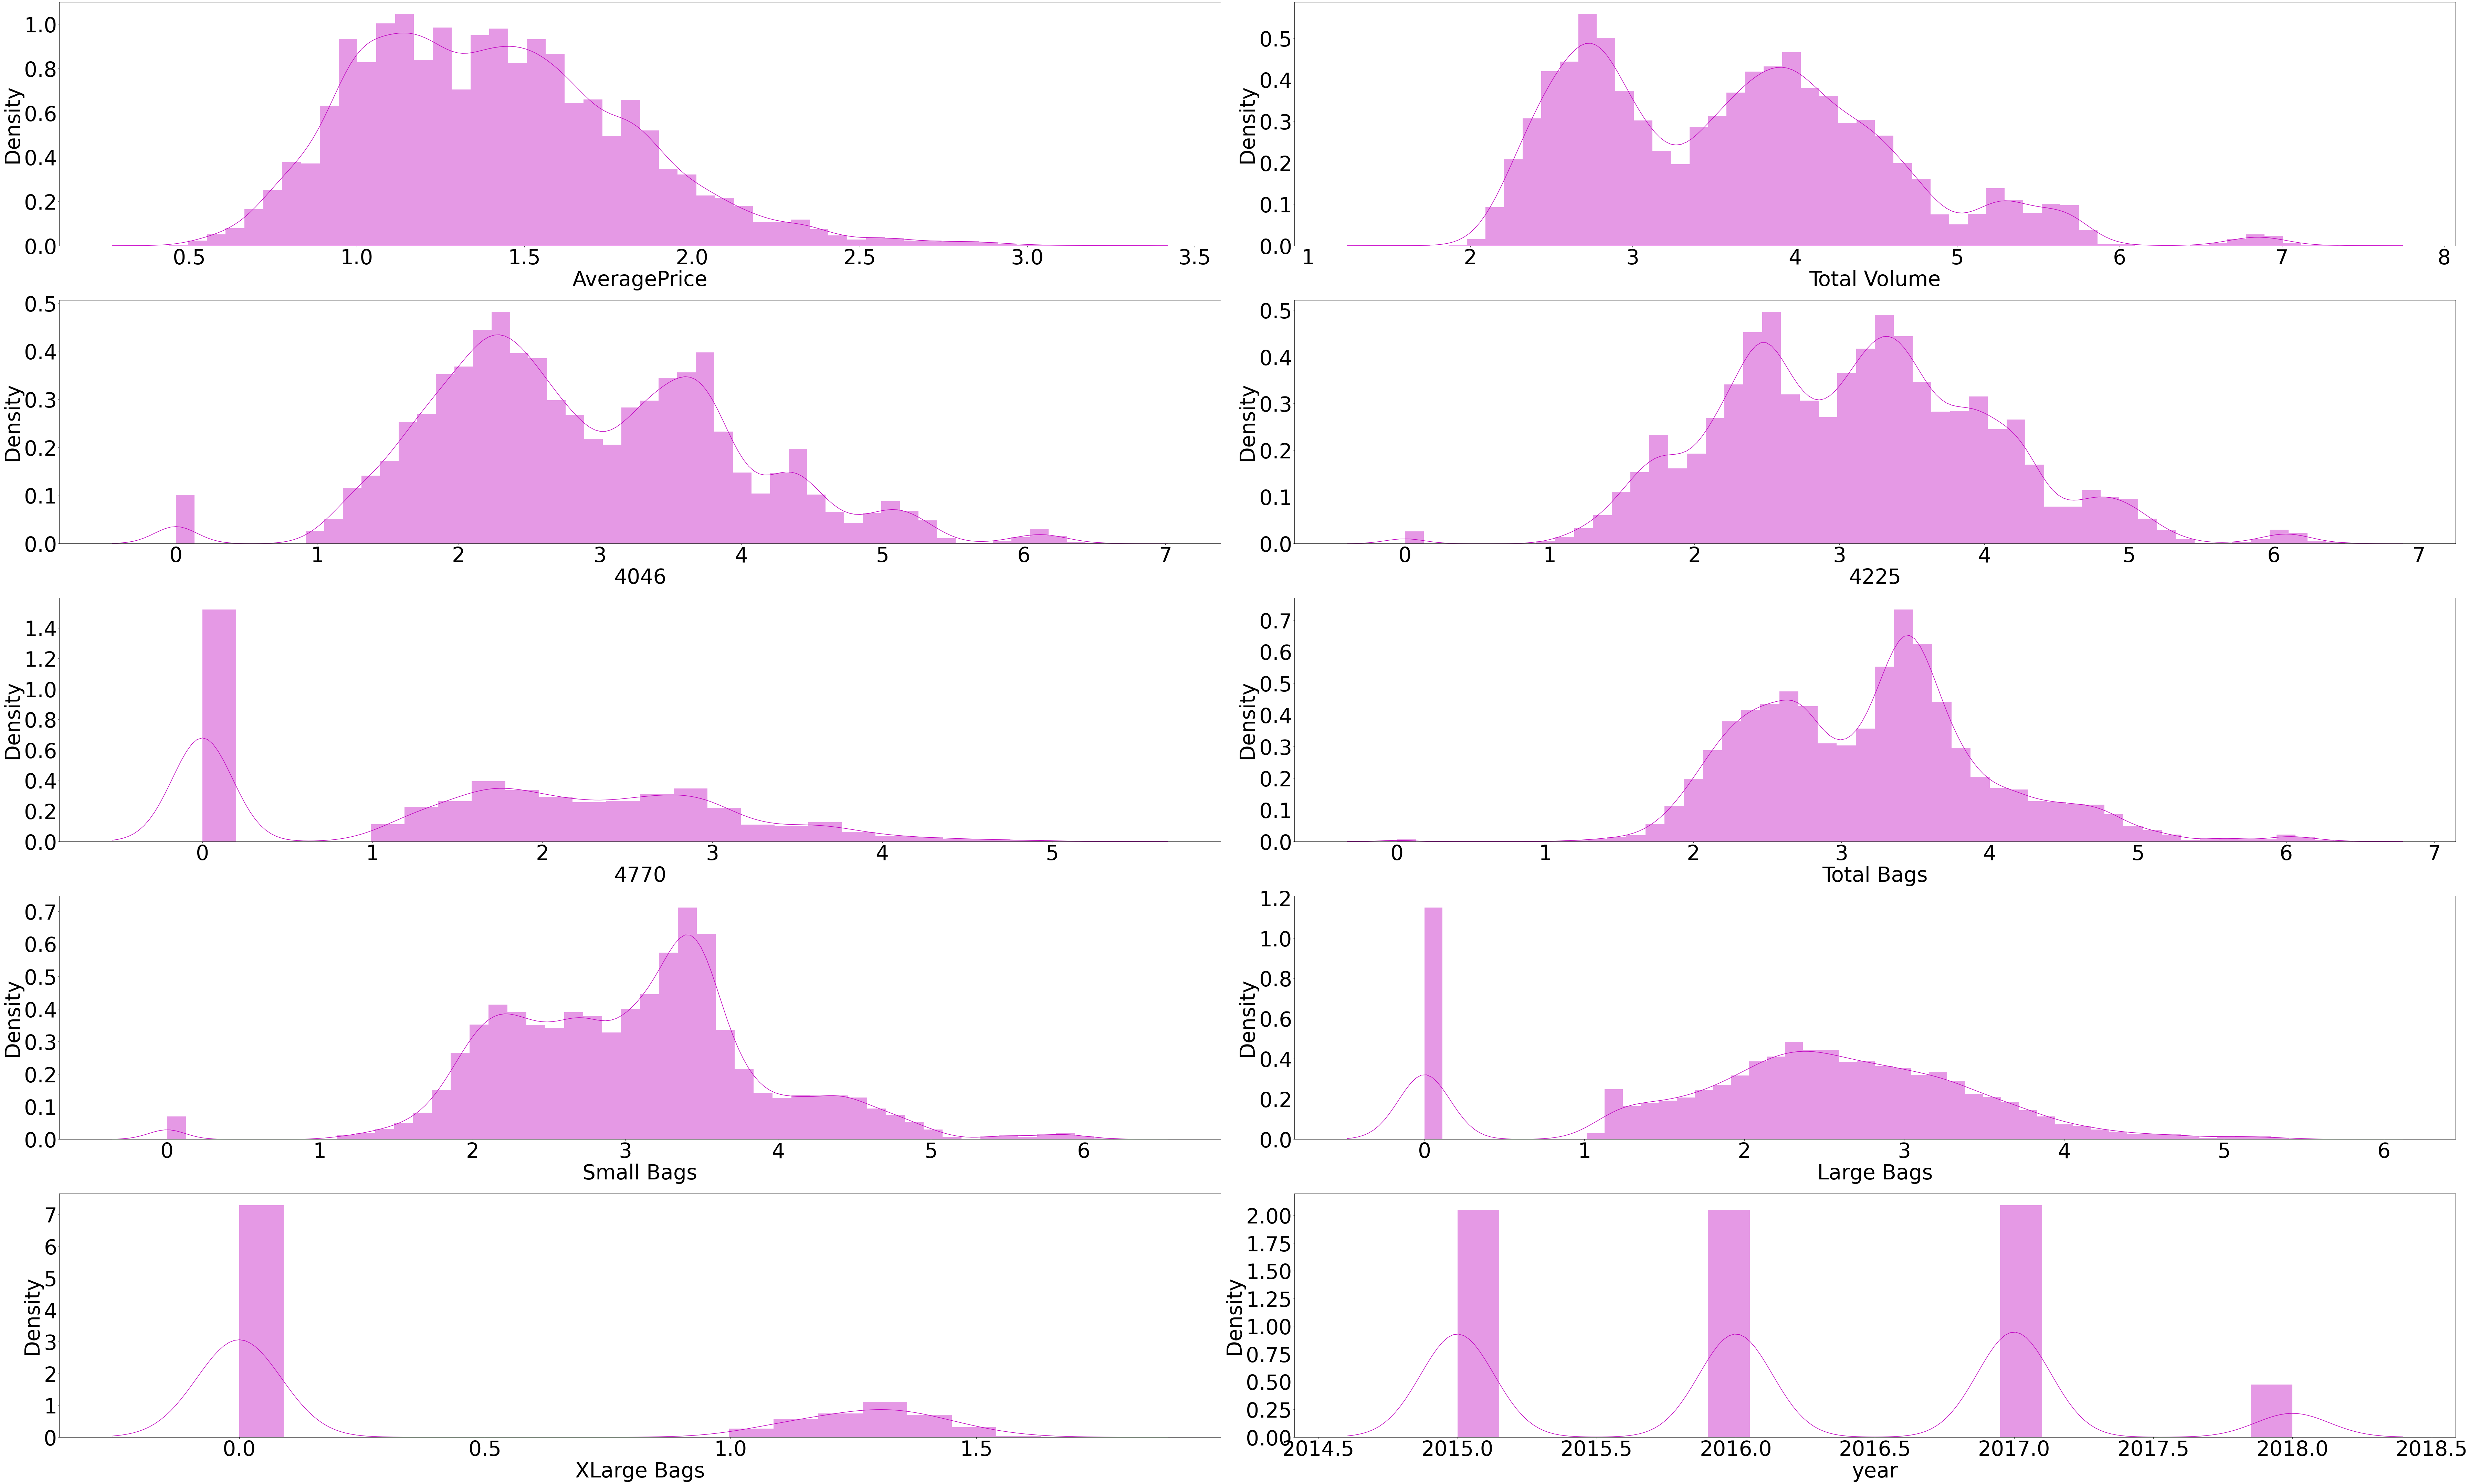

In [51]:
#let's check how the data has been distributed in remaining column
from socket import socket
plt.figure(figsize = (100, 60), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.distplot(AP[col], color = "m")
        plt.xlabel(col, fontsize = 60)
        plt.ylabel('Density', fontsize = 60)
        plt.yticks(rotation = 0, fontsize = 60)
        plt.xticks(rotation = 0, fontsize = 60)
    plotnumber+=1
plt.tight_layout()

# Encoding categorical columns

In [53]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in AP.columns:
    if AP[i].dtypes=='object':
        AP[i] = OE.fit_transform(AP[i].values.reshape(-1, 1))
AP

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,3.421355,2.163089,3.359126,1.538031,2.739725,2.736445,1.655198,0.0,0.0,2015,0.0
1,50.0,1.35,3.362009,2.062128,3.285752,1.571123,2.766926,2.763758,1.663396,0.0,0.0,2015,0.0
2,49.0,0.93,3.661276,2.100123,3.628944,1.718177,2.719854,2.716005,1.673841,0.0,0.0,2015,0.0
3,48.0,1.08,3.500870,2.184320,3.464877,1.609746,2.619699,2.612930,1.722894,0.0,0.0,2015,0.0
4,47.0,1.28,3.335038,2.140048,3.279153,1.617482,2.637860,2.628355,1.799324,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161.0,1.63,2.952989,2.332926,2.258548,0.000000,2.876877,2.866502,1.962523,0.0,1.0,2018,53.0
18245,160.0,1.71,2.885981,2.196829,2.470766,0.000000,2.759051,2.748133,1.901378,0.0,1.0,2018,53.0
18246,159.0,1.87,2.883170,2.196874,2.380285,2.079748,2.763302,2.761917,1.516058,0.0,1.0,2018,53.0
18247,158.0,1.93,2.935888,2.258290,2.432433,2.079452,2.811317,2.809890,1.544452,0.0,1.0,2018,53.0


In [55]:
AP.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,83.997096,1.405978,3.632601,2.888426,3.124737,1.645151,3.198636,3.044688,2.264887,0.436489,0.499918,2016.147899,26.495644
std,48.787638,0.402677,0.939032,1.068459,0.946596,1.259821,0.797040,0.851187,1.147374,0.612791,0.500014,0.939938,15.583788
min,0.000000,0.440000,1.637304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000
25%,42.000000,1.100000,2.807568,2.117003,2.434938,0.000000,2.581337,2.420259,1.713698,0.000000,0.000000,2015.000000,13.000000
50%,84.000000,1.370000,3.622347,2.737915,3.132733,1.786098,3.243620,3.098998,2.400595,0.000000,0.000000,2016.000000,26.000000
75%,126.000000,1.660000,4.229336,3.635802,3.759999,2.640667,3.634939,3.521763,3.037774,1.198397,1.000000,2017.000000,40.000000
max,168.000000,3.250000,7.348746,6.567935,6.491541,5.149563,6.451919,6.192200,5.633965,1.631757,1.000000,2018.000000,53.000000


# Correlation between target variable and independent variables.

In [57]:
# Checking the correlation between features and the target
cor = AP.corr()
cor

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.145514,0.061601,0.001493,-0.003525,-0.046486,0.195792,0.183966,0.201770,0.167471,-0.000060,0.950274,-0.000101
AveragePrice,0.145514,1.000000,-0.568395,-0.552586,-0.460275,-0.487383,-0.557007,-0.493254,-0.468128,-0.410727,0.615845,0.093197,-0.011716
Total Volume,0.061601,-0.568395,1.000000,0.904696,0.935735,0.829398,0.953382,0.908349,0.681196,0.674887,-0.771411,0.072831,0.126248
4046,0.001493,-0.552586,0.904696,1.000000,0.790908,0.755551,0.833377,0.795887,0.608855,0.617845,-0.712142,0.011931,0.198612
4225,-0.003525,-0.460275,0.935735,0.790908,1.000000,0.812757,0.850783,0.802395,0.624530,0.624445,-0.736521,0.007077,0.084083
4770,-0.046486,-0.487383,0.829398,0.755551,0.812757,1.000000,0.781345,0.757492,0.563825,0.642350,-0.770055,-0.037890,0.082588
Total Bags,0.195792,-0.557007,0.953382,0.833377,0.850783,0.781345,1.000000,0.946561,0.725141,0.655161,-0.709054,0.202806,0.127325
Small Bags,0.183966,-0.493254,0.908349,0.795887,0.802395,0.757492,0.946561,1.000000,0.573322,0.630354,-0.700328,0.189249,0.100225
Large Bags,0.201770,-0.468128,0.681196,0.608855,0.624530,0.563825,0.725141,0.573322,1.000000,0.473532,-0.490786,0.205604,0.128407
XLarge Bags,0.167471,-0.410727,0.674887,0.617845,0.624445,0.642350,0.655161,0.630354,0.473532,1.000000,-0.682650,0.162684,0.016468


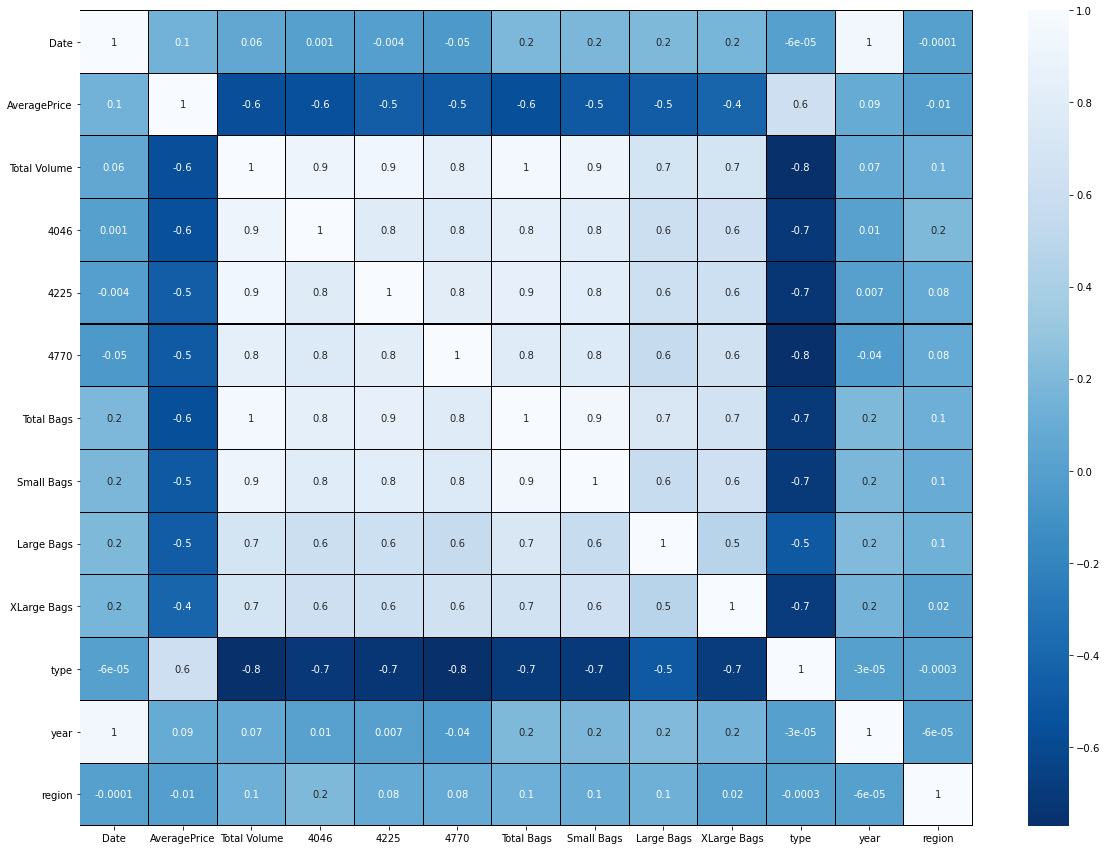

In [58]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(AP.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()

# Separating features and label

In [62]:
# We will drop Date column because it has no effect on dataset
AP.drop('Date', inplace = True, axis = 1)

In [63]:
AP.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,3.421355,2.163089,3.359126,1.538031,2.739725,2.736445,1.655198,0.0,0.0,2015,0.0
1,1.35,3.362009,2.062128,3.285752,1.571123,2.766926,2.763758,1.663396,0.0,0.0,2015,0.0
2,0.93,3.661276,2.100123,3.628944,1.718177,2.719854,2.716005,1.673841,0.0,0.0,2015,0.0
3,1.08,3.500870,2.184320,3.464877,1.609746,2.619699,2.612930,1.722894,0.0,0.0,2015,0.0
4,1.28,3.335038,2.140048,3.279153,1.617482,2.637860,2.628355,1.799324,0.0,0.0,2015,0.0


In [66]:
x = AP.drop("AveragePrice", axis = 1)
y = AP["AveragePrice"]

# Feature Scaling using Standard Scalarization

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.224969,-0.678881,0.247619,-0.085030,-0.575785,-0.362142,-0.531393,-0.712317,-0.999836,-1.221282,-1.700252
1,-0.288169,-0.773376,0.170103,-0.058762,-0.541656,-0.330054,-0.524247,-0.712317,-0.999836,-1.221282,-1.700252
2,0.030537,-0.737814,0.532667,0.057967,-0.600717,-0.386157,-0.515144,-0.712317,-0.999836,-1.221282,-1.700252
3,-0.140288,-0.659010,0.359339,-0.028103,-0.726378,-0.507256,-0.472390,-0.712317,-0.999836,-1.221282,-1.700252
4,-0.316892,-0.700447,0.163131,-0.021963,-0.703592,-0.489134,-0.405775,-0.712317,-0.999836,-1.221282,-1.700252
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.723757,-0.519922,-0.915081,-1.305897,-0.403704,-0.209344,-0.263534,-0.712317,1.000164,1.970504,1.700811
18245,-0.795118,-0.647302,-0.690885,-1.305897,-0.551537,-0.348411,-0.316827,-0.712317,1.000164,1.970504,1.700811
18246,-0.798112,-0.647260,-0.786473,0.344977,-0.546203,-0.332217,-0.652664,-0.712317,1.000164,1.970504,1.700811
18247,-0.741969,-0.589777,-0.731382,0.344742,-0.485960,-0.275855,-0.627916,-0.712317,1.000164,1.970504,1.700811


# Checking Variance Inflation Factor(VIF)

In [68]:
# Finding variance inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,68.965603,Total Volume
1,8.407238,4046
2,13.829516,4225
3,4.089334,4770
4,35.196632,Total Bags
5,13.403592,Small Bags
6,2.929814,Large Bags
7,2.212445,XLarge Bags
8,3.294885,type
9,1.355693,year


In [69]:
# Dropping Total Volume column
x.drop("Total Volume", axis = 1, inplace = True)

In [70]:
# Finding variance inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,4.188870,4046
1,4.995350,4225
2,4.069959,4770
3,22.433017,Total Bags
4,13.375420,Small Bags
5,2.901818,Large Bags
6,2.208966,XLarge Bags
7,3.230974,type
8,1.324186,year
9,1.096241,region


In [71]:
# Dropping Total Bags column
x.drop("Total Bags", axis = 1, inplace = True)

In [72]:
# Finding variance inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,4.032456,4046
1,4.589895,4225
2,4.066920,4770
3,4.222325,Small Bags
4,1.895038,Large Bags
5,2.200775,XLarge Bags
6,3.219359,type
7,1.298633,year
8,1.095159,region


In [73]:
y.value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64

# Modelling

In [74]:
# importing necessary libraries:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [75]:
maxAccu = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ", maxAccu, "at random state", maxRs)

Best accuracy is  0.5020302723361313 at random state 113


# Creating train test split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = maxRs)

# Regression Algorithm

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [78]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_LR))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_LR))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score:  0.5020302723361313
R2_score on training data:-  46.596793645449964
Mean Absolute Error:-  0.22016855730025184
Mean Squared Error:-  0.08138575301931739
Root Mean Squared Error:-  0.28528188344042704


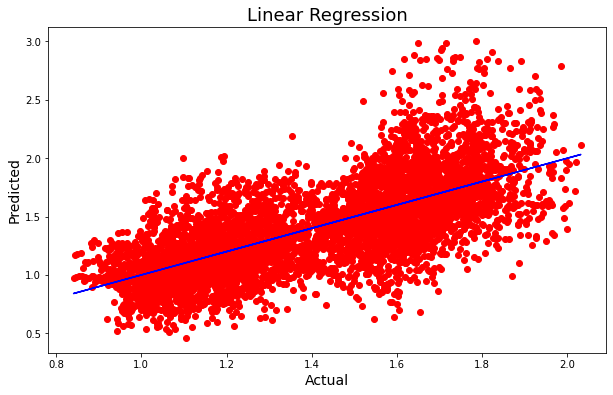

In [79]:
plt.figure(figsize=(10,6))
plt.scatter(x = pred_LR, y = y_test, color = 'r')
plt.plot(pred_LR, pred_LR, color = 'b')
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title("Linear Regression", fontsize = 18)
plt.show()

In [80]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_RFR))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_RFR))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score:  0.8472946605499837
R2_score on training data:-  97.77347659472997
Mean Absolute Error:-  0.10958913242009133
Mean Squared Error:-  0.024957418796347032
Root Mean Squared Error:-  0.15797917203336342


In [81]:
KNN = KNN()
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)
pred_train = KNN.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_KNN))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_KNN))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_KNN))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_KNN)))

R2_score:  0.8169749067570495
R2_score on training data:-  88.06812511604272
Mean Absolute Error:-  0.11814356164383562
Mean Squared Error:-  0.02991273205479452
Root Mean Squared Error:-  0.17295297642652618


In [82]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_GBR))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_GBR))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score:  0.6909923015144702
R2_score on training data:-  68.53255666338029
Mean Absolute Error:-  0.16774008907664334
Mean Squared Error:-  0.050502716998464946
Root Mean Squared Error:-  0.22472809570337426


In [83]:
LA = Lasso()
LA.fit(x_train, y_train)
pred_LA = LA.predict(x_test)
pred_train = LA.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_LA))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_LA))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_LA))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_LA)))

R2_score:  -0.00014456152260411415
R2_score on training data:-  0.0
Mean Absolute Error:-  0.32683230534626195
Mean Squared Error:-  0.16345876816559365
Root Mean Squared Error:-  0.4043003440087501


In [84]:
RD = Ridge()
RD.fit(x_train, y_train)
pred_RD = LR.predict(x_test)
pred_train = RD.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_RD))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_RD))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_RD))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_RD)))

R2_score:  0.5020302723361313
R2_score on training data:-  46.59679221065803
Mean Absolute Error:-  0.22016855730025184
Mean Squared Error:-  0.08138575301931739
Root Mean Squared Error:-  0.28528188344042704


In [85]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
pred_DTR = DTR.predict(x_test)
pred_train = DTR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_DTR))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_DTR))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_DTR))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_DTR)))

R2_score:  0.6825417406171534
R2_score on training data:-  100.0
Mean Absolute Error:-  0.14780639269406393
Mean Squared Error:-  0.05188383561643835
Root Mean Squared Error:-  0.22778023535073966


In [86]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_svr))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_svr))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_svr)))

R2_score:  0.7078833135003042
R2_score on training data:-  70.82034775931977
Mean Absolute Error:-  0.158003601765932
Mean Squared Error:-  0.04774213206055213
Root Mean Squared Error:-  0.21849973011551327


In [87]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(x_train, y_train)
pred_ETR = ETR.predict(x_test)
pred_train = ETR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_ETR))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_ETR))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2_score:  0.864861846251257
R2_score on training data:-  100.0
Mean Absolute Error:-  0.10119764383561644
Mean Squared Error:-  0.022086323311415523
Root Mean Squared Error:-  0.14861468067258873


# Cross Validation Score

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
# Checking cv score for LinearRegression
score = cross_val_score(LR, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_LR) - score.mean())

[-0.23034893  0.06218808  0.44116056  0.11307223  0.09931127]
0.0970766410072045
Difference between R2 score and cross validation score is -  0.4049536313289268


In [90]:
# Checking cv score for RandomForestRegression
score1 = cross_val_score(RFR, x, y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_RFR) - score1.mean())

[0.19645233 0.30445318 0.52526977 0.13798228 0.04981448]
0.24279440912695044
Difference between R2 score and cross validation score is -  0.6045002514230333


In [91]:
# Checking cv score for KNeighborsRegressor
score2 = cross_val_score(KNN, x, y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_KNN) - score2.mean())

[-0.16065185  0.30902194  0.44298478  0.23555787 -0.15796481]
0.13378958649846662
Difference between R2 score and cross validation score is -  0.6831853202585829


In [92]:
# Checking cv score for GradientBoostingRegressor
score3 = cross_val_score(GBR, x, y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_GBR) - score3.mean())

[0.26260345 0.36884122 0.58580668 0.25231818 0.12489632]
0.3188931704142147
Difference between R2 score and cross validation score is -  0.3720991311002555


In [93]:
# Checking cv score for Lasso
score4 = cross_val_score(LA, x, y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_LA) - score4.mean())

[-3.98236185 -0.75045983 -0.01749803 -0.47032699 -0.80592045]
-1.2053134266962335
Difference between R2 score and cross validation score is -  1.2051688651736294


In [94]:
# Checking cv score for Ridge
score5 = cross_val_score(RD, x, y)
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_RD) - score5.mean())

[-0.23035391  0.06225512  0.44116472  0.11307076  0.09930402]
0.09708814351995945
Difference between R2 score and cross validation score is -  0.40494212881617186


In [95]:
# Checking cv score for DecisionTreesRegressor
score6 = cross_val_score(DTR, x, y)
print(score6)
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_DTR) - score6.mean())

[-1.72071099 -0.28927488  0.17109342 -0.68826517 -0.30873385]
Difference between R2 score and cross validation score is -  1.2497200335749303


In [96]:
# Checking cv score for SVR
score7 = cross_val_score(svr, x, y)
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_svr) - score7.mean())

[-0.54351738  0.29453743  0.06934886  0.35331259 -0.11887066]
0.01096216774290808
Difference between R2 score and cross validation score is -  0.6969211457573962


In [97]:
# Checking cv score for ETR
score8 = cross_val_score(ETR, x, y)
print(score8)
print(score8.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_ETR) - score8.mean())

[0.26963112 0.36898644 0.6128419  0.35733795 0.09613945]
0.34098737279842767
Difference between R2 score and cross validation score is -  0.5238744734528293


In [98]:
# Checking cv score for SVR
score7 = cross_val_score(svr, x, y)
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_svr) - score7.mean())

[-0.54351738  0.29453743  0.06934886  0.35331259 -0.11887066]
0.01096216774290808
Difference between R2 score and cross validation score is -  0.6969211457573962


# Extra Tree Regressor is our best Model

# Hyper Parameter Tuning

In [106]:
# ETR
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators': range(50,126,25)}

In [107]:
GCV=GridSearchCV(ExtraTreesRegressor(), param_grid, cv = 5)

In [108]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'n_estimators': range(50, 126, 25)})

In [109]:
GCV.best_params_

{'n_estimators': 100}

In [110]:
Final_model = ExtraTreesRegressor(n_estimators = 100)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
print('R2_score:- ',r2_score(y_test, pred)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred))
print('Root Mean Squared Error:- ',np.sqrt(mean_squared_error(y_test, pred)))

R2_score:-  86.30389389214763
Mean Absolute Error:-  0.10140595433789953
Mean Squared Error:-  0.02238425042922374
Root Mean Squared Error:-  0.1496136705960513


# Saving the model

In [111]:
import joblib
joblib.dump(Final_model, "Avocado project average price.pki")

['Avocado project average price.pki']

# Predicting the saved model

In [112]:
import pickle
filename = "Avocado project average price.pki"
pickle.dump(Final_model, open(filename, 'wb'))

In [114]:
import pickle
loaded_model = pickle.load(open("Avocado project average price.pki", 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

86.30389389214763


# Prediction With Region

# Separating features and label

In [116]:
x_a = AP.drop("region", axis = 1)
y_a = AP["region"]

# Feature Scaling using Standard Scalarization

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_a = pd.DataFrame(scaler.fit_transform(x_a), columns = x_a.columns)
x_a

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.188689,-0.224969,-0.678881,0.247619,-0.085030,-0.575785,-0.362142,-0.531393,-0.712317,-0.999836,-1.221282
1,-0.139020,-0.288169,-0.773376,0.170103,-0.058762,-0.541656,-0.330054,-0.524247,-0.712317,-0.999836,-1.221282
2,-1.182069,0.030537,-0.737814,0.532667,0.057967,-0.600717,-0.386157,-0.515144,-0.712317,-0.999836,-1.221282
3,-0.809551,-0.140288,-0.659010,0.359339,-0.028103,-0.726378,-0.507256,-0.472390,-0.712317,-0.999836,-1.221282
4,-0.312861,-0.316892,-0.700447,0.163131,-0.021963,-0.703592,-0.489134,-0.405775,-0.712317,-0.999836,-1.221282
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,-0.723757,-0.519922,-0.915081,-1.305897,-0.403704,-0.209344,-0.263534,-0.712317,1.000164,1.970504
18245,0.755023,-0.795118,-0.647302,-0.690885,-1.305897,-0.551537,-0.348411,-0.316827,-0.712317,1.000164,1.970504
18246,1.152375,-0.798112,-0.647260,-0.786473,0.344977,-0.546203,-0.332217,-0.652664,-0.712317,1.000164,1.970504
18247,1.301382,-0.741969,-0.589777,-0.731382,0.344742,-0.485960,-0.275855,-0.627916,-0.712317,1.000164,1.970504


# Checking Variance Inflation Factor(VIF)

In [118]:
# Finding variance inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_a = pd.DataFrame()
vif_a["VIF values"] = [variance_inflation_factor(x_a.values, i)
                     for i in range(len(x_a.columns))]
vif_a["Features"] = x_a.columns

vif_a

,VIF values,Features
0,2.068117,AveragePrice
1,70.160873,Total Volume
2,8.118908,4046
3,14.849673,4225
4,4.115762,4770
5,35.622730,Total Bags
6,13.696386,Small Bags
7,2.960191,Large Bags
8,2.214888,XLarge Bags
9,3.855480,type


In [119]:
# Dropping Total Volume column
x_a.drop("Total Volume", axis = 1, inplace = True)

In [120]:
# Finding variance inflation factor again in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_a = pd.DataFrame()
vif_a["VIF values"] = [variance_inflation_factor(x_a.values, i)
                     for i in range(len(x_a.columns))]
vif_a["Features"] = x_a.columns

vif_a

,VIF values,Features
0,2.028408,AveragePrice
1,4.020586,4046
2,5.328127,4225
3,4.102153,4770
4,23.879535,Total Bags
5,13.634295,Small Bags
6,2.923518,Large Bags
7,2.209285,XLarge Bags
8,3.832126,type
9,1.415209,year


In [121]:
# Dropping Total Bags column
x_a.drop("Total Bags", axis = 1, inplace = True)

In [122]:
# Finding variance inflation factor again in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_a = pd.DataFrame()
vif_a["VIF values"] = [variance_inflation_factor(x_a.values, i)
                     for i in range(len(x_a.columns))]
vif_a["Features"] = x_a.columns

vif_a

,VIF values,Features
0,1.903655,AveragePrice
1,3.897229,4046
2,4.751197,4225
3,4.092004,4770
4,4.278545,Small Bags
5,2.047290,Large Bags
6,2.198105,XLarge Bags
7,3.733881,type
8,1.362444,year


In [123]:
y_a.value_counts()

0.0     338
39.0    338
37.0    338
48.0    338
46.0    338
3.0     338
15.0    338
41.0    338
6.0     338
18.0    338
5.0     338
17.0    338
40.0    338
26.0    338
9.0     338
47.0    338
49.0    338
11.0    338
10.0    338
36.0    338
1.0     338
32.0    338
31.0    338
12.0    338
13.0    338
34.0    338
27.0    338
2.0     338
8.0     338
38.0    338
20.0    338
19.0    338
52.0    338
28.0    338
29.0    338
25.0    338
4.0     338
45.0    338
21.0    338
35.0    338
23.0    338
50.0    338
7.0     338
14.0    338
30.0    338
51.0    338
24.0    338
43.0    338
42.0    338
22.0    338
33.0    338
44.0    338
16.0    338
53.0    335
Name: region, dtype: int64

# Finding the best random state

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1, 200):
    x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x_a, y_a, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_a_train, y_a_train)
    pred = RFR.predict(x_a_test)
    acc = accuracy_score(y_a_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ", maxAccu, "at random state", maxRs)

Best accuracy is  0.919634703196347 at random state 66


# Creating train test split

In [125]:
x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x_a, y_a, test_size = 0.3, random_state = maxRs)

# Classification Algorithm

In [126]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# RandomForestClassifier

In [127]:
# Checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_a_train, y_a_train)
predRFC = RFC.predict(x_a_test)
print(accuracy_score(y_a_test, predRFC))
print(confusion_matrix(y_a_test, predRFC))
print(classification_report(y_a_test, predRFC))

0.9165296803652968
[[ 84   0   0 ...   0   0   0]
 [  0  90   0 ...   0   0   0]
 [  0   0  99 ...   0   0   0]
 ...
 [  0   0   0 ...  98   0   0]
 [  0   0   0 ...   0 113   0]
 [  0   0   0 ...   0   0  84]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87        92
         1.0       0.87      0.90      0.89       100
         2.0       0.96      0.95      0.96       104
         3.0       0.94      0.94      0.94        96
         4.0       0.93      0.99      0.96        99
         5.0       0.93      0.82      0.87        93
         6.0       1.00      0.99      1.00       111
         7.0       0.90      0.95      0.92        94
         8.0       0.97      1.00      0.98       111
         9.0       0.92      0.89      0.90       110
        10.0       0.84      0.94      0.89       108
        11.0       0.93      0.95      0.94       103
        12.0       0.98      0.97      0.97        96
        13.0       0.91      0.8

# Logistic Regression

In [128]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_a_train, y_a_train)
predLR = LR.predict(x_a_test)
print(accuracy_score(y_a_test, predLR))
print(confusion_matrix(y_a_test, predLR))
print(classification_report(y_a_test, predLR))

0.4995433789954338
[[ 61   0   0 ...   0   0   0]
 [  0  45   0 ...   0   0   0]
 [  0   0  61 ...   0   0   5]
 ...
 [  0   0   0 ...  97   1   0]
 [  0   0   0 ...   0 101   0]
 [  0   4   2 ...   0   0  10]]
              precision    recall  f1-score   support

         0.0       0.49      0.66      0.56        92
         1.0       0.27      0.45      0.33       100
         2.0       0.61      0.59      0.60       104
         3.0       0.52      0.39      0.44        96
         4.0       0.45      0.45      0.45        99
         5.0       0.32      0.34      0.33        93
         6.0       0.82      0.87      0.84       111
         7.0       0.46      0.69      0.56        94
         8.0       0.67      0.75      0.71       111
         9.0       0.49      0.79      0.60       110
        10.0       0.64      0.44      0.52       108
        11.0       0.53      0.64      0.58       103
        12.0       0.41      0.55      0.47        96
        13.0       0.23      0.2

# Support Vector Machine Classifier

In [129]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_a_train, y_a_train)
predsvc = svc.predict(x_a_test)
print(accuracy_score(y_a_test, predsvc))
print(confusion_matrix(y_a_test, predsvc))
print(classification_report(y_a_test, predsvc))

0.782283105022831
[[ 83   0   0 ...   0   0   0]
 [  0  49   0 ...   0   0   0]
 [  0   0  98 ...   0   0   0]
 ...
 [  0   0   0 ...  98   0   0]
 [  0   0   0 ...   0 108   0]
 [  0   2   3 ...   0   0  58]]
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82        92
         1.0       0.47      0.49      0.48       100
         2.0       0.92      0.94      0.93       104
         3.0       0.77      0.74      0.76        96
         4.0       0.87      0.91      0.89        99
         5.0       0.66      0.71      0.68        93
         6.0       0.99      0.99      0.99       111
         7.0       0.72      0.81      0.76        94
         8.0       0.95      0.95      0.95       111
         9.0       0.67      0.88      0.76       110
        10.0       0.65      0.69      0.67       108
        11.0       0.83      0.83      0.83       103
        12.0       0.90      0.97      0.93        96
        13.0       0.64      0.63

# Gradient Boosting Classifier

In [130]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_a_train, y_a_train)
predGB = GB.predict(x_a_test)
print(accuracy_score(y_a_test, predGB))
print(confusion_matrix(y_a_test, predGB))
print(classification_report(y_a_test, predGB))

0.8330593607305936
[[ 78   0   0 ...   0   0   0]
 [  0  61   0 ...   0   0   2]
 [  0   0 100 ...   0   0   0]
 ...
 [  0   0   0 ...  97   1   0]
 [  0   0   0 ...   0 110   0]
 [  0   0   2 ...   0   0  77]]
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80        92
         1.0       0.76      0.61      0.68       100
         2.0       0.89      0.96      0.93       104
         3.0       0.81      0.77      0.79        96
         4.0       0.87      0.83      0.85        99
         5.0       0.75      0.74      0.75        93
         6.0       0.98      0.95      0.96       111
         7.0       0.84      0.87      0.85        94
         8.0       0.94      0.95      0.95       111
         9.0       0.87      0.80      0.83       110
        10.0       0.69      0.85      0.76       108
        11.0       0.88      0.86      0.87       103
        12.0       0.93      0.90      0.91        96
        13.0       0.79      0.7

# AdaBoost Classifier

In [131]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_a_train, y_a_train)
predABC = ABC.predict(x_a_test)
print(accuracy_score(y_a_test, predABC))
print(confusion_matrix(y_a_test, predABC))
print(classification_report(y_a_test, predABC))

0.08091324200913241
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  1]
 [ 0  0  0 ...  1  0  0]
 ...
 [ 0  0  0 ... 69  0  0]
 [ 0  0  0 ... 52  0  0]
 [ 0  0  0 ...  2  0 33]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        92
         1.0       0.00      0.00      0.00       100
         2.0       0.00      0.00      0.00       104
         3.0       0.00      0.00      0.00        96
         4.0       0.07      0.33      0.11        99
         5.0       0.00      0.00      0.00        93
         6.0       0.00      0.00      0.00       111
         7.0       0.05      0.99      0.09        94
         8.0       0.00      0.00      0.00       111
         9.0       0.00      0.00      0.00       110
        10.0       0.33      0.02      0.04       108
        11.0       0.00      0.00      0.00       103
        12.0       0.00      0.00      0.00        96
        13.0       0.00      0.00      0.00        99
        14.0 

# Bagging Classifier

In [132]:
# Checking accuracy for Bagging Classifier
BC = BaggingClassifier()
BC.fit(x_a_train, y_a_train)
predBC = BC.predict(x_a_test)
print(accuracy_score(y_a_test, predBC))
print(confusion_matrix(y_a_test, predBC))
print(classification_report(y_a_test, predBC))

0.8661187214611872
[[ 80   0   0 ...   0   0   0]
 [  0  77   0 ...   0   0   0]
 [  0   0  94 ...   0   0   0]
 ...
 [  0   0   0 ...  98   0   0]
 [  0   0   0 ...   0 108   0]
 [  0   0   4 ...   0   0  67]]
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83        92
         1.0       0.82      0.77      0.79       100
         2.0       0.89      0.90      0.90       104
         3.0       0.81      0.92      0.86        96
         4.0       0.87      0.94      0.90        99
         5.0       0.80      0.80      0.80        93
         6.0       0.98      0.97      0.98       111
         7.0       0.83      0.90      0.87        94
         8.0       0.92      0.99      0.95       111
         9.0       0.83      0.85      0.84       110
        10.0       0.73      0.87      0.79       108
        11.0       0.89      0.89      0.89       103
        12.0       0.95      0.94      0.94        96
        13.0       0.83      0.8

# ExtraTreesClassifier

In [133]:
# Checking accuracy for ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_a_train, y_a_train)
predET = ET.predict(x_a_test)
print(accuracy_score(y_a_test, predET))
print(confusion_matrix(y_a_test, predET))
print(classification_report(y_a_test, predET))

0.9258447488584475
[[ 84   0   0 ...   0   0   0]
 [  0  88   0 ...   0   0   0]
 [  0   0 103 ...   0   0   0]
 ...
 [  0   0   0 ...  98   0   0]
 [  0   0   0 ...   0 113   0]
 [  0   0   0 ...   0   0  89]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90        92
         1.0       0.89      0.88      0.88       100
         2.0       0.97      0.99      0.98       104
         3.0       0.92      0.95      0.93        96
         4.0       0.98      0.97      0.97        99
         5.0       0.88      0.84      0.86        93
         6.0       1.00      1.00      1.00       111
         7.0       0.92      0.95      0.93        94
         8.0       0.94      1.00      0.97       111
         9.0       0.91      0.95      0.93       110
        10.0       0.87      0.92      0.89       108
        11.0       0.92      0.95      0.94       103
        12.0       0.97      0.98      0.97        96
        13.0       0.91      0.8

In [134]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier

In [135]:
# Checking accuracy for KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_a_train, y_a_train)
predKNN = KNN.predict(x_a_test)
print(accuracy_score(y_a_test, predKNN))
print(confusion_matrix(y_a_test, predKNN))
print(classification_report(y_a_test, predKNN))

0.8200913242009132
[[ 81   0   0 ...   0   0   0]
 [  0  73   0 ...   0   0   0]
 [  0   0  96 ...   0   0   0]
 ...
 [  0   0   0 ...  98   0   0]
 [  0   0   0 ...   0 111   0]
 [  0   0   0 ...   0   0  81]]
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.81        92
         1.0       0.67      0.73      0.70       100
         2.0       0.87      0.92      0.90       104
         3.0       0.72      0.84      0.78        96
         4.0       0.87      0.91      0.89        99
         5.0       0.73      0.71      0.72        93
         6.0       0.97      0.94      0.95       111
         7.0       0.70      0.85      0.77        94
         8.0       0.96      0.87      0.92       111
         9.0       0.77      0.85      0.81       110
        10.0       0.73      0.80      0.76       108
        11.0       0.84      0.93      0.88       103
        12.0       0.91      0.89      0.90        96
        13.0       0.76      0.7

# Extra Trees Classifier is our best Model

Extra Trees Classifier is our best Model because it has highest accuracy score among all models

# Hyper Parameter Tuning

In [138]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy']}

In [139]:
GCV=GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)

In [140]:
GCV.fit(x_a_train, y_a_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

In [141]:
GCV.best_params_

{'criterion': 'gini'}

In [142]:
Final_model = ExtraTreesClassifier(criterion = 'gini')
Final_model.fit(x_a_train, y_a_train)
pred = Final_model.predict(x_a_test)
acc = accuracy_score(y_a_test, pred)
print(acc*100)

92.5662100456621


# Saving the model

In [145]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model, "Avocado project region.pki")

['Avocado project region.pki']

# Predicting the saved model

In [147]:
# Lets Load the saved model and get the predictions
model = joblib.load("Avocado project region.pki")

# Prediction
prediction = model.predict(x_a_test)
prediction

array([35., 23., 38., ..., 26., 52., 44.])